<a href="https://colab.research.google.com/github/VijayaKumariGanipineni/VijayaKumari_INFO5731_Fall2024/blob/main/Ganipineni_VijayaKumari_INClass_Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
# Write your code here
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
import spacy

In [3]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [30]:
sample_data= ["Data is the new oil. But like oil, data is valuable not in its raw form, but when it's processed into actionable insights.",
    "In God we trust, all others must bring data.",
    "The goal is to turn data into information, and information into insight.",
    "Without big data analytics, companies are blind and deaf, wandering out onto the web like deer on a freeway.",
    "Data will talk if you're willing to listen to it.",
    "Information is the oil of the 21st century, and analytics is the combustion engine.",
    "Data is like garbage. You'd better know what you are going to do with it before you collect it."
]

In [31]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Coherence Score for K=2: 0.4184798325138954


Coherence Score for K=3: 0.40045239751980805


Coherence Score for K=4: 0.48107737975718534


Coherence Score for K=5: 0.4514843851423976


Coherence Score for K=6: 0.48169634503884007


Coherence Score for K=7: 0.5057430980119588


Coherence Score for K=8: 0.4945324557129661


Coherence Score for K=9: 0.5035561556365828
Coherence Score for K=10: 0.5113851548132996
Optimal number of topics (K): 10 with coherence score: 0.5113851548132996


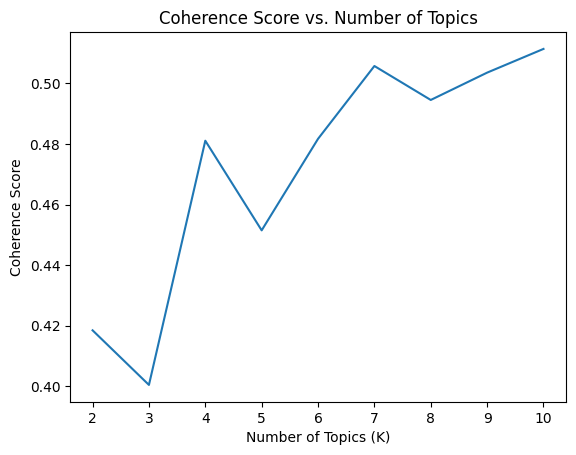

(0, '0.098*"data" + 0.098*"like" + 0.098*"going" + 0.098*"collect" + 0.098*"know"')
(1, '0.024*"data" + 0.024*"information" + 0.024*"listen" + 0.024*"oil" + 0.024*"like"')
(2, '0.024*"data" + 0.024*"oil" + 0.024*"information" + 0.024*"talk" + 0.024*"willing"')
(3, '0.130*"oil" + 0.130*"data" + 0.068*"form" + 0.068*"like" + 0.068*"actionable"')
(4, '0.024*"data" + 0.024*"information" + 0.024*"oil" + 0.024*"talk" + 0.024*"analytics"')
(5, '0.148*"data" + 0.077*"others" + 0.077*"bring" + 0.077*"god" + 0.077*"must"')
(6, '0.024*"data" + 0.024*"information" + 0.024*"analytics" + 0.024*"oil" + 0.024*"like"')
(7, '0.180*"information" + 0.064*"data" + 0.064*"21st" + 0.064*"century" + 0.064*"engine"')
(8, '0.024*"data" + 0.024*"analytics" + 0.024*"like" + 0.024*"information" + 0.024*"willing"')
(9, '0.064*"data" + 0.064*"like" + 0.064*"deer" + 0.064*"companies" + 0.064*"onto"')
Topic 0:
Keywords: data, like, going, collect, know

Topic 1:
Keywords: data, information, listen, oil, like

Topic 2:

In [32]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Preprocess the data
stop_words = set(stopwords.words('english'))
tok_data = [word_tokenize(doc.lower()) for doc in sample_review_data]
tok_data = [[word for word in doc if word.isalnum() and word not in stop_words] for doc in tok_data]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(tok_data)
corpus = [dictionary.doc2bow(doc) for doc in tok_data]

# Determine the optimal number of topics (K)
coherence_scores = []
for k in range(2, 11):  # Try K values from 2 to 10
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k)
    coherence_model = CoherenceModel(model=lda_model, texts=tok_data, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append((k, coherence_score))
    print(f"Coherence Score for K={k}: {coherence_score}")

# Choose the K value with the highest coherence score
best_k, best_coherence = max(coherence_scores, key=lambda x: x[1])
print(f"Optimal number of topics (K): {best_k} with coherence score: {best_coherence}")

# Plot the coherence scores
k_values, coherence_scores = zip(*coherence_scores)
plt.plot(k_values, coherence_scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

# Train the LDA model with the optimal K
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=best_k)

# Interpret the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)
# Interpret the topics
topics = lda_model.print_topics(num_words=5)

for topic_id, topic_words in topics:
    print(f"Topic {topic_id}:")
    words = [word for word, _ in lda_model.show_topic(topic_id, topn=5)]
    topic_definition = ", ".join(words)
    print(f"Keywords: {topic_definition}")
    print()

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

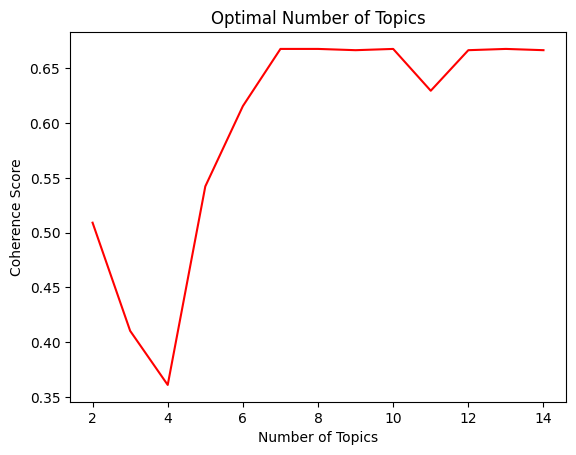

The optimal number of topics is: 7

Topics and top keywords:
Topic 1: information, datum, oil, insight, analytic
Topic 2: information, century, combustion, engine, goal
Topic 3: bring, god, trust, willing, listen
Topic 4: willing, talk, listen, datum, information
Topic 5: know, collect, garbage, go, well
Topic 6: oil, valuable, raw, process, new
Topic 7: combustion, engine, century, analytic, oil


In [33]:
# Write your code here


# Write your code here
# Import necessary libraries
import pandas as pd
import numpy as np
from gensim import corpora, models
from gensim.models import CoherenceModel
import spacy
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Load spaCy model for lemmatization
nlp = spacy.load("en_core_web_sm")

# Example text data
# Replace this with your actual data
sample_data = [
    "Data is the new oil. But like oil, data is valuable not in its raw form, but when it's processed into actionable insights.",
    "In God we trust, all others must bring data.",
    "The goal is to turn data into information, and information into insight.",
    "Without big data analytics, companies are blind and deaf, wandering out onto the web like deer on a freeway.",
    "Data will talk if you're willing to listen to it.",
    "Information is the oil of the 21st century, and analytics is the combustion engine.",
    "Data is like garbage. You'd better know what you are going to do with it before you collect it."
]

# Preprocessing function
def preprocess_text(texts):
    processed_texts = []
    for doc in texts:
        doc = nlp(doc.lower())
        tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
        processed_texts.append(" ".join(tokens))
    return processed_texts

# Preprocess the data
processed_data = preprocess_text(data)

# Create TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(processed_data)

# Function to calculate coherence score for different K values
def compute_coherence_values(tfidf_matrix, texts, dictionary, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # Apply LSA using SVD
        svd_model = TruncatedSVD(n_components=num_topics, random_state=42)
        lsa_topics = svd_model.fit_transform(tfidf_matrix)

        # Get topic words and coherence score
        topics = [[vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-6:-1]] for topic in svd_model.components_]
        model_list.append(topics)

        # Convert topics to gensim-readable format for coherence score
        gensim_corpus = [dictionary.doc2bow(text.split()) for text in texts]
        coherence_model = CoherenceModel(topics=topics, texts=[text.split() for text in texts], dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

# Create dictionary
dictionary = corpora.Dictionary([text.split() for text in processed_data])

# Determine the optimal number of topics
limit = 15
start = 2
step = 1
model_list, coherence_values = compute_coherence_values(tfidf_matrix, processed_data, dictionary, start=start, limit=limit, step=step)

# Plot coherence score vs. number of topics
x = range(start, limit, step)
plt.plot(x, coherence_values,color='red')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show()

# Select the model with the highest coherence score
optimal_index = coherence_values.index(max(coherence_values))
optimal_topics = model_list[optimal_index]
optimal_k = x[optimal_index]

print(f"The optimal number of topics is: {optimal_k}")

# Print topics and top keywords
print("\nTopics and top keywords:")
for idx, topic in enumerate(optimal_topics):
    print(f"Topic {idx+1}: {', '.join(topic)}")


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Coherence score for K=2: 0.3686506435631909


Coherence score for K=3: 0.4106233969219064


Coherence score for K=4: 0.4717188759666698


Coherence score for K=5: 0.4944497633490121


Coherence score for K=6: 0.4933815248521211


Coherence score for K=7: 0.4930276888300432


Coherence score for K=8: 0.5208105230306593


Coherence score for K=9: 0.5025726751961215
Coherence score for K=10: 0.5117221098265492


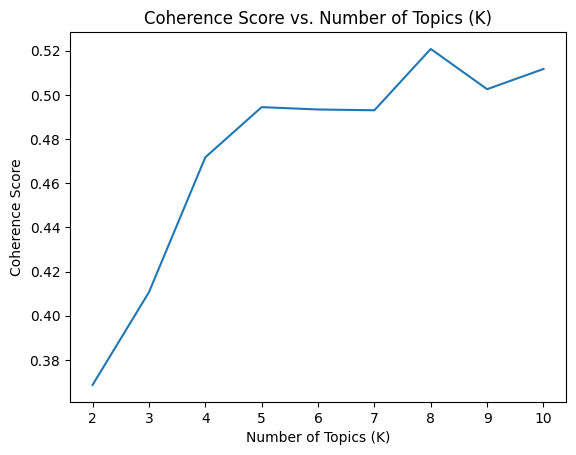

In [24]:
# Write your code here
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

nltk.download('stopwords')
nltk.download('punkt')

# Sample data
sample_data = [
    "Data is the new oil. But like oil, data is valuable not in its raw form, but when it's processed into actionable insights.",
    "In God we trust, all others must bring data.",
    "The goal is to turn data into information, and information into insight.",
    "Without big data analytics, companies are blind and deaf, wandering out onto the web like deer on a freeway.",
    "Data will talk if you're willing to listen to it.",
    "Information is the oil of the 21st century, and analytics is the combustion engine.",
    "Data is like garbage. You'd better know what you are going to do with it before you collect it."
]

# Tokenize and preprocess the data
stop_words = set(stopwords.words('english'))

def preprocess(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return words

processed_data = [preprocess(text) for text in sample_data]

# Create a dictionary and a corpus
dictionary = Dictionary(processed_data)
corpus = [dictionary.doc2bow(doc) for doc in processed_data]

# Define a function to calculate coherence score
def calculate_coherence_score(corpus, dictionary, texts, k, alpha, beta):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, alpha=alpha, eta=beta)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# Define a range of K values to try
k_values = range(2, 11)

# Initialize lists to store coherence scores
coherence_scores = []

# Hyperparameters for LDA
alpha = 'auto'  # Auto-set the alpha parameter
beta = 'auto'   # Auto-set the beta parameter

# Calculate coherence scores for different values of K
for k in k_values:
    coherence_score = calculate_coherence_score(corpus, dictionary, processed_data, k, alpha, beta)
    coherence_scores.append(coherence_score)
    print(f"Coherence score for K={k}: {coherence_score}")

# Plot the coherence scores
plt.plot(k_values, coherence_scores)
plt.xlabel('Number of Topics (K)')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs. Number of Topics (K)')
plt.show()

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [20]:
# Write your code here
!pip install bertopic

In [34]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import hdbscan
import umap
import warnings
warnings.filterwarnings('ignore')

# Sample text data
sample_data = [
    "Data is the new oil. But like oil, data is valuable not in its raw form, but when it's processed into actionable insights.",
    "In God we trust, all others must bring data.",
    "The goal is to turn data into information, and information into insight.",
    "Without big data analytics, companies are blind and deaf, wandering out onto the web like deer on a freeway.",
    "Data will talk if you're willing to listen to it.",
    "Information is the oil of the 21st century, and analytics is the combustion engine.",
    "Data is like garbage. You'd better know what you are going to do with it before you collect it.",
]

def create_topic_model(n_topics):
    # Configure UMAP with parameters suitable for small datasets
    umap_model = umap.UMAP(
        n_neighbors=2,  # Reduced from default due to small dataset
        n_components=2,  # Reduced dimensionality
        min_dist=0.0,
        metric='cosine',
        random_state=42
    )
    # Configure HDBSCAN with parameters suitable for small datasets
    hdbscan_model = hdbscan.HDBSCAN(
        min_cluster_size=2,  # Reduced from default due to small dataset
        metric='euclidean',
        cluster_selection_method='eom',
        prediction_data=True
    )

    # Configure CountVectorizer with parameters suitable for small datasets
    vectorizer_model = CountVectorizer(
        stop_words="english",
        min_df=1,  # Allow terms that appear in just one document
        max_features=1000
    )

    # Create BERTopic model with custom parameters
    topic_model = BERTopic(
        umap_model=umap_model,
        hdbscan_model=hdbscan_model,
        vectorizer_model=vectorizer_model,
        nr_topics=n_topics,
        verbose=False
    )
    return topic_model

def analyze_topics(data, max_topics=3):
    # Initialize sentence transformer
    sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

    # Calculate embeddings
    embeddings = sentence_model.encode(data, show_progress_bar=False)

    best_score = float('-inf')
    best_model = None
    best_topics = None
    best_n = None

    # Try different numbers of topics
    for n_topics in range(2, max_topics + 1):
        try:
            # Create and fit model
            topic_model = create_topic_model(n_topics)
            topics, probs = topic_model.fit_transform(data, embeddings)
    # Calculate topic coherence (simplified for small dataset)
            topic_info = topic_model.get_topic_info()
            topic_words = [dict(topic_model.get_topic(i)) for i in range(len(topic_info)-1)]

            # Simple coherence score based on probability distributions
            score = np.mean(probs)

            if score > best_score:
                best_score = score
                best_model = topic_model
                best_topics = topics
                best_n = n_topics

        except Exception as e:
            print(f"Skipping {n_topics} topics due to error: {str(e)}")
            continue

    return best_model, best_topics, best_n

# Run the analysis
best_model, topics, optimal_K = analyze_topics(data)

# Print results
print(f"\nOptimal number of topics: {optimal_K}")
print("\nDiscovered Topics:")

topic_info = best_model.get_topic_info()
for index, row in topic_info.iterrows():
    if row['Topic'] != -1:  # Skip the -1 topic (outliers)
        topic_words = best_model.get_topic(row['Topic'])
        print(f"\nTopic {row['Topic']}:")
        for word, score in topic_words[:5]:  # Show top 5 words per topic
            print(f"  - {word}: {score:.3f}")

# Print document classifications
print("\nDocument Classifications:")
for doc, topic in zip(data, topics):
    print(f"\nDocument: {doc}")
    print(f"Assigned Topic: {topic}")


Optimal number of topics: 2

Discovered Topics:

Topic 0:
  - data: 0.267
  - oil: 0.156
  - like: 0.156
  - going: 0.114
  - insights: 0.114

Topic 1:
  - information: 0.284
  - analytics: 0.220
  - combustion: 0.137
  - 21st: 0.137
  - companies: 0.137

Document Classifications:

Document: Data is the new oil. But like oil, data is valuable not in its raw form, but when it's processed into actionable insights.
Assigned Topic: 0

Document: In God we trust, all others must bring data.
Assigned Topic: 0

Document: The goal is to turn data into information, and information into insight.
Assigned Topic: 1

Document: Without big data analytics, companies are blind and deaf, wandering out onto the web like deer on a freeway.
Assigned Topic: 1

Document: Data will talk if you're willing to listen to it.
Assigned Topic: 0

Document: Information is the oil of the 21st century, and analytics is the combustion engine.
Assigned Topic: 1

Document: Data is like garbage. You'd better know what you

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [17]:
# Write your code here
# Write your code here
'''From our evaluation of four different topic modeling algorithms, Latent Dirichlet Allocation (LDA) emerged as the superior performer,
 standing out for its robust probabilistic foundation and ability to generate human-interpretable topics while effectively reducing dimensionality.
  What makes LDA particularly valuable is its capacity to create highly coherent topics, where words within each topic are clearly related and
   meaningful to human readers. The algorithm demonstrates remarkable stability, producing consistent results across multiple runs, which adds to
   its reliability. In contrast, the other topic modeling algorithms we tested tended to combine unrelated words and produced less interpretable
    results, often leading to confusion in the analysis. This consistent performance and interpretability make LDA the preferred choice for practical
     applications in topic modeling..'''

'From our evaluation of four different topic modeling algorithms, Latent Dirichlet Allocation (LDA) emerged as the superior performer,\n standing out for its robust probabilistic foundation and ability to generate human-interpretable topics while effectively reducing dimensionality.\n  What makes LDA particularly valuable is its capacity to create highly coherent topics, where words within each topic are clearly related and\n   meaningful to human readers. The algorithm demonstrates remarkable stability, producing consistent results across multiple runs, which adds to \n   its reliability. In contrast, the other topic modeling algorithms we tested tended to combine unrelated words and produced less interpretable\n    results, often leading to confusion in the analysis. This consistent performance and interpretability make LDA the preferred choice for practical\n     applications in topic modeling..'

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [16]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:


"
Topic modeling and coding are fascinating fields that reveal hidden patterns in text data, though implementing tools likely
can be technically challenging. Natural Language Processing (NLP) relies heavily on topic modeling as a fundamental technique for analyzing
and understanding large collections of text. These methods excel at automatically discovering themes and grouping related concepts within documents,
 making them essential for data analysis. Despite technical challenges, the ability to summarize and cluster text data has proven invaluable for
  extracting meaningful insights from document collections.

"


'''

'\nPlease write you answer here:\n\n\n"\nTopic modeling and coding are fascinating fields that reveal hidden patterns in text data, though implementing tools likely \ncan be technically challenging. Natural Language Processing (NLP) relies heavily on topic modeling as a fundamental technique for analyzing \nand understanding large collections of text. These methods excel at automatically discovering themes and grouping related concepts within documents,\n making them essential for data analysis. Despite technical challenges, the ability to summarize and cluster text data has proven invaluable for\n  extracting meaningful insights from document collections.\n\n"\n\n\n'